In [129]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate data

In [3]:
def generate_data(d,n,theta,sigma):
    X = np.random.normal(0,1,size = (d,n))
    B = np.random.normal(0, sigma**2, n)
    Y = np.matmul(X.T,theta) + B
    return X,Y

# 2) Risque moyen

In [79]:
def E(w, theta, sigma):
    return (1/2)*np.linalg.norm(w-theta)**2 + (sigma**2)/2

# 3) Risque empirique

In [40]:
def En(w, X, Y):
    return 1/(2*len(X))*np.linalg.norm(np.matmul(X.T, w)-Y)**2

# 4) Gradient du risque empirique

In [2]:
def grad_En(w,X,Y):
    return np.matmul(X, np.matmul(X.T, w) - Y)/len(X)

# 5) Gradient stochastique suivant la loi uniforme

In [10]:
def grad_sto_En(w, X , Y, n_batch):
    I = np.random.uniform(0,len(X),n_batch)
    k = 0
    grad = np.zeros((len(X),n_batch))
    for i in I:
        grad[:, k] = grad_En(w, X[:,i], Y[i])
        k = k+1
    return grad

# 6) Constante de Lipschitz

In [5]:
L = np.linalg.norm(np.dot(X, X.T)/len(X))
L

NameError: name 'np' is not defined

# 7) Méthode d'optim la plus efficace

Nous avons un problème des moindres carrés, le gradient conjugué serait pour moi la méthode la plus efficace.

pas plus petit que 2/L, lemme de descente

# 8) Descente de gradient à pas constant

In [123]:
def descente_grad(X, Y, alpha, w0, itermax, theta, sigma):
    iter = 0
    w = w0
    En_k = [En(w, X, Y)]
    E_k = [E(w, theta, sigma)]
    
    while (iter < itermax):
        w = w - alpha*grad_En(w, X,Y)
        En_k.append(En(w, X, Y))
        E_k.append(E(w, theta, sigma))
        iter = iter + 1 
    return w, En_k, E_k

# 9) Erreur d'approximation

In [3]:
def erreur_approximation(w, theta):
    erreur = np.linalg.norm(w - theta)
    return erreur

# 10) Gradient stochastique à pas constant

faire varier les lr

In [8]:
def descente_grad_sto(X, Y, w0, itermax, theta, sigma, n_batch, alpha):
    iter = 0
    w = w0
    En_k = [En(w, X, Y)]
    E_k = [E(w, theta, sigma)]    
    while (iter < itermax):
        w = w - alpha*grad_sto_En(w, X , Y, n_batch)
        En_k.append(En(w, X, Y))
        E_k.append(E(w, theta, sigma))
        iter = iter + 1 
    return w, En_k, E_k

# 11) Gradient stochastique à pas décroissant

In [9]:
def descente_grad_sto(X, Y, w0, itermax, theta, sigma, n_batch):
    iter = 0
    w = w0
    En_k = [En(w, X, Y)]
    E_k = [E(w, theta, sigma)]
    alpha = 1
    
    while (iter < itermax):
        alpha = 1 / srqt(iter) #mise à jour d'alpha avec beta qui est la vitesse de convergence
        w = w - alpha*grad_sto_En(w, X , Y, n_batch)
        En_k.append(En(w, X, Y))
        E_k.append(E(w, theta, sigma))
        iter = iter + 1 
    return w, En_k, E_k

# 12) Taux de convergence entre les deux gradient stochastiques

jsp


# 13) Gradient stochastique online

jsp

# 14) Méthode SAGA

In [11]:
def saga(X, Y, alpha, lambda_reg, w0, n_epochs, n_batch):
    n_samples, n_features = X.shape
    w = w0.copy()
    gradient_memory = np.zeros((n_samples, n_features))
    average_gradient = np.mean(gradient_memory, axis=0, keepdims=True)

    for epoch in range(n_epochs):
        for i in range(0, n_samples, n_batch):
            gradient_batch = grad_sto_En(w, X, Y, n_batch)
            gradient_memory[i:i+n_batch, :] = gradient_batch
            average_gradient = np.mean(gradient_memory, axis=0, keepdims=True)
            w = w - alpha * (average_gradient + lambda_reg * w.T)

    return w

In [ ]:
X, Y = generate_data(d,n,theta, sigma)

In [ ]:
d = 3
n = 4
theta = np.ones(d)
sigma = 2
w0 = np.ones(d)

In [124]:
w, En_k, E_k = descente_grad(X,Y, 0.1, w0, 100, theta, sigma)

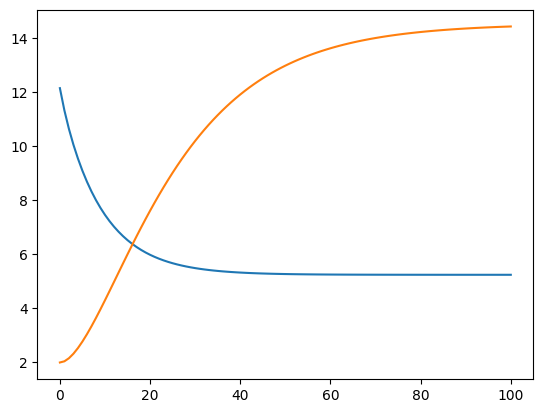

In [130]:
plt.plot(En_k)


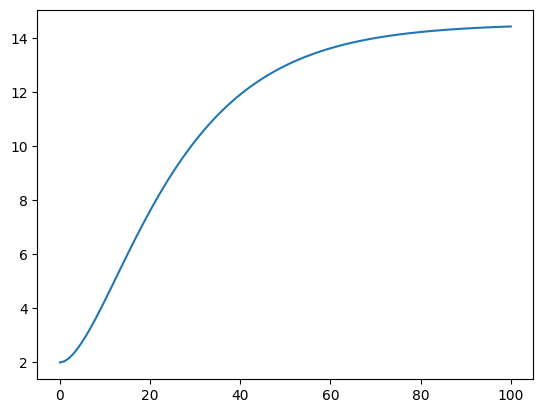

In [131]:
plt.plot(E_k)

# Avec pytorch

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

def descente_gradient_stochastique_pytorch(X, Y, alpha, nb_epochs):
    # Convertir les données en tenseurs PyTorch
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

    # Initialiser les poids aléatoirement
    w = torch.randn((X.shape[1], 1), requires_grad=True)

    # Définir la fonction de perte (ici, la perte quadratique)
    criterion = nn.MSELoss()

    # Définir l'optimiseur (descente de gradient stochastique)
    optimizer = optim.SGD([w], lr=alpha)

    for epoch in range(nb_epochs):
        # Mélanger les indices pour obtenir un ordre aléatoire
        indices = torch.randperm(X_tensor.shape[0])

        for i in indices:
            x_i = X_tensor[i].view(1, -1)
            y_i = Y_tensor[i]

            # Calculer la perte
            loss = criterion(x_i.mm(w), y_i)

            # Calculer le gradient
            loss.backward()

            # Mettre à jour les poids
            optimizer.step()

            # Remettre les gradients à zéro
            optimizer.zero_grad()

    # Récupérer les poids optimaux
    w_optimal = w.detach().numpy()

    return w_optimal

# Exemple d'utilisation
# Assumez que X et Y soient vos données d'entraînement
# X doit être une matrice de caractéristiques avec chaque ligne étant une observation
# Y doit être un vecteur de labels correspondant

# Définir des paramètres
alpha = 0.01
nb_epochs = 1000

# Appel de la fonction de descente de gradient stochastique avec PyTorch
w_optimal_pytorch = descente_gradient_stochastique_pytorch(X, Y, alpha, nb_epochs)

# Afficher les poids optimaux
print("Poids optimaux avec PyTorch :", w_optimal_pytorch)


ModuleNotFoundError: No module named 'torch'